In [9]:
!pip install plotly

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.offline as py 
from plotly.offline import init_notebook_mode , iplot
import plotly.graph_objs as go 
from plotly import tools 
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [4]:
df = pd.read_csv('Mall_Customers_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.shape

(200, 5)

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [18]:
dat =ff.create_table(df.head())
py.iplot(dat)

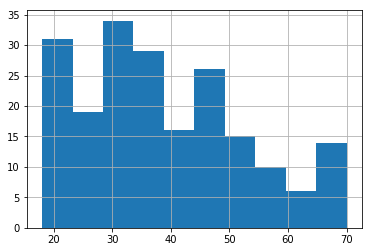

In [19]:
df.Age.hist(
)

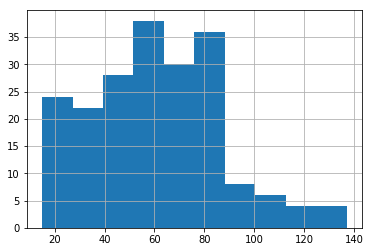

In [21]:
df['Annual Income (k$)'].hist()

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



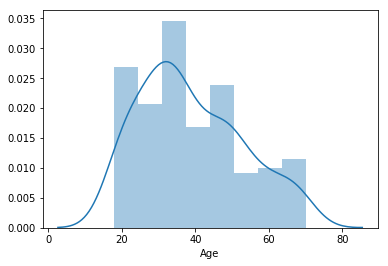

In [22]:
sns.distplot(df.Age)

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



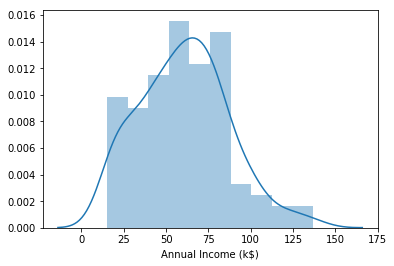

In [23]:
sns.distplot(df['Annual Income (k$)'])

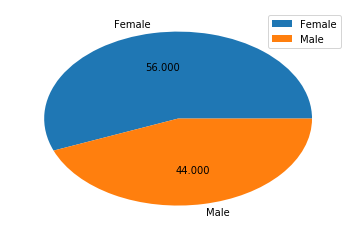

In [53]:
plt.pie(df.Gender.value_counts(),labels=labels,autopct='%1.3f')
plt.legend()
plt.show()

In [52]:
labels = df.Gender.value_counts().index

(array([ 4., 13., 10.,  6.,  6.,  6.,  2.,  2.,  1.,  1.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

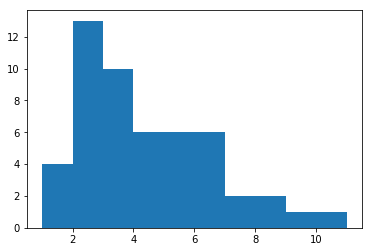

In [55]:
plt.hist(df.Age.value_counts())

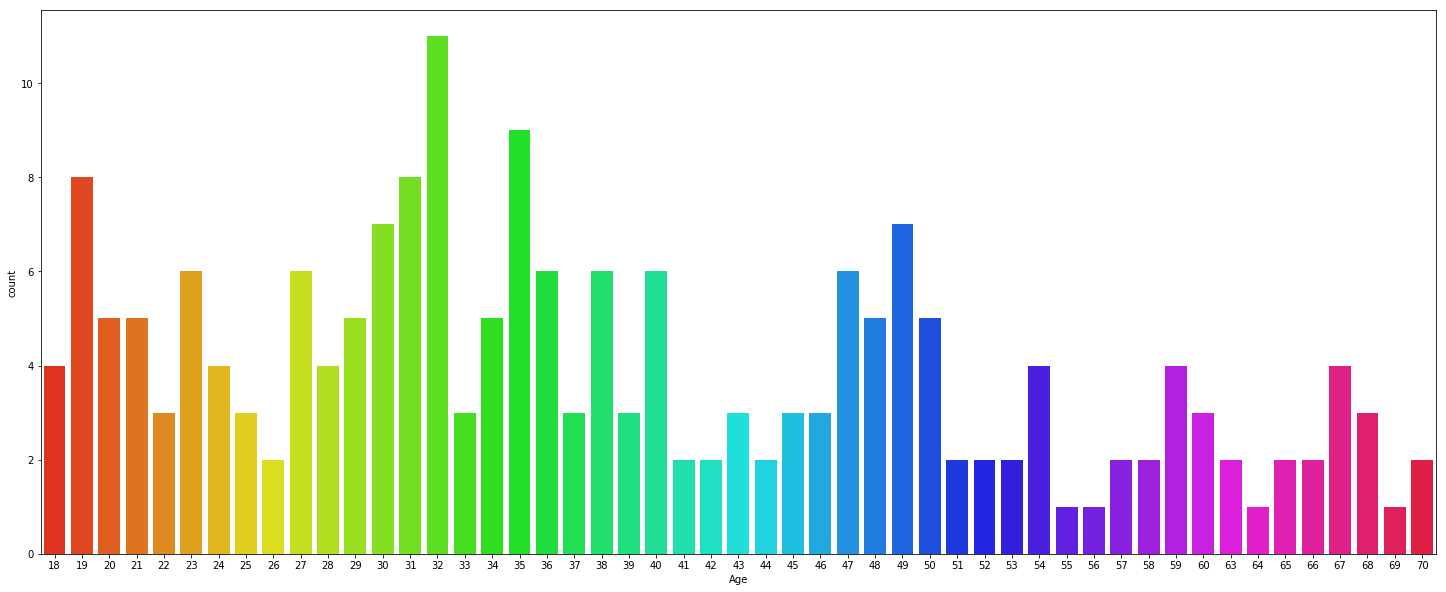

In [59]:
plt.figure(figsize=(25,10))
sns.countplot(df.Age,palette='hsv')

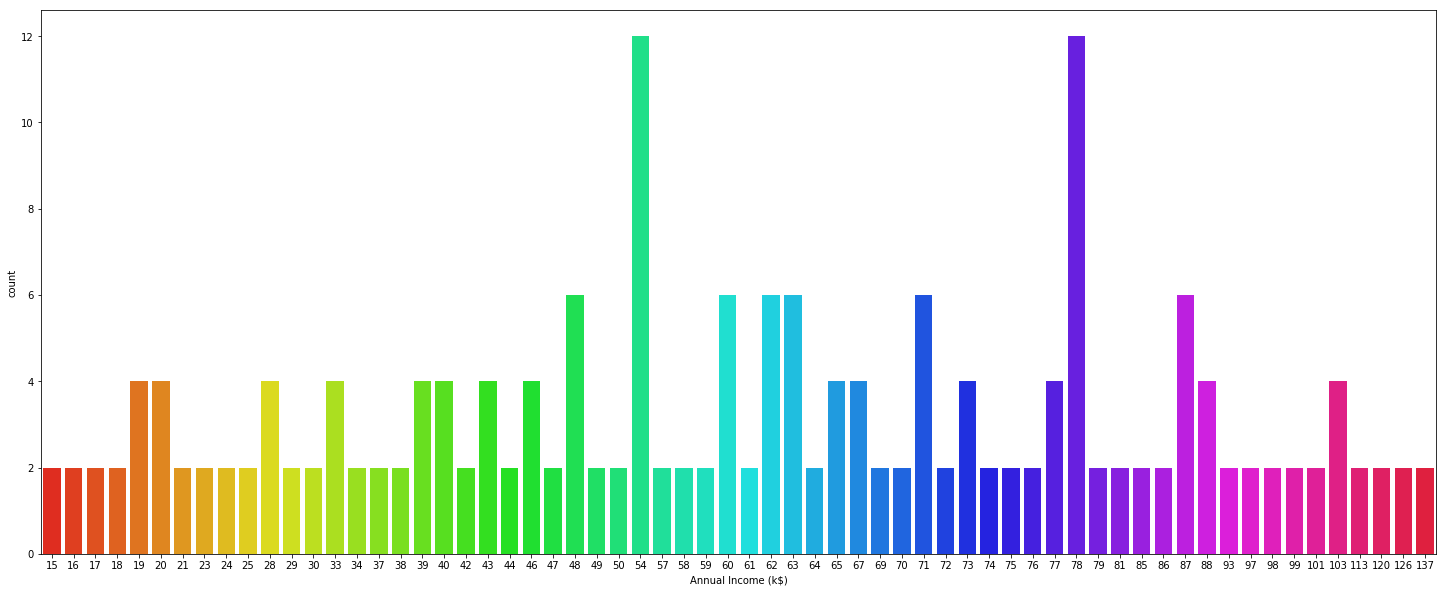

In [61]:
plt.figure(figsize=(25,10))
sns.countplot(df['Annual Income (k$)'],palette='hsv')

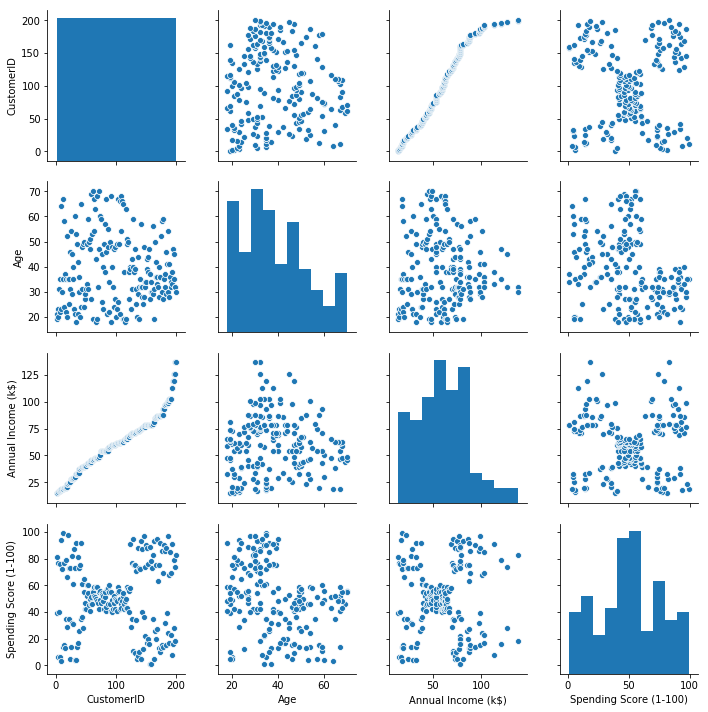

In [62]:
sns.pairplot(df)

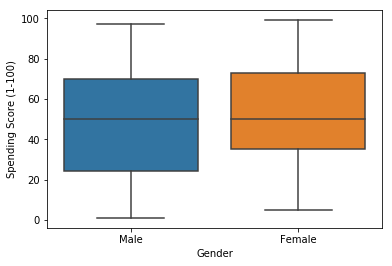

In [64]:
sns.boxplot(x='Gender',y='Spending Score (1-100)',data=df)

In [63]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

C:\Users\Karthik Bharadhwaj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



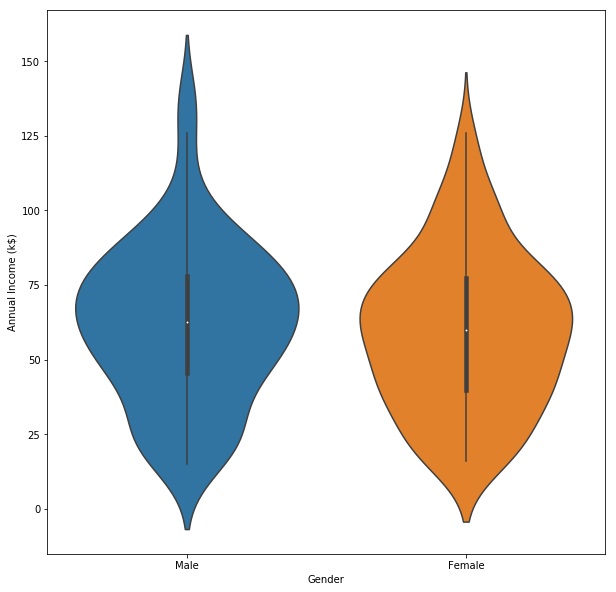

In [67]:
plt.figure(figsize=(10,10))
sns.violinplot(x='Gender',y='Annual Income (k$)',data=df)


## Build K-Means Clustering

In [70]:
x = df.iloc[:,[3,4]].values

## Elbow Curve 

In [74]:
from sklearn.cluster import KMeans
wss=[]
for i in range(1,11):
    km = KMeans(n_clusters= i , random_state= 0 )
    km.fit(x)
    wss.append(km.inertia_)
    #inertia_ is sum of squared dist  from closest cluster
    

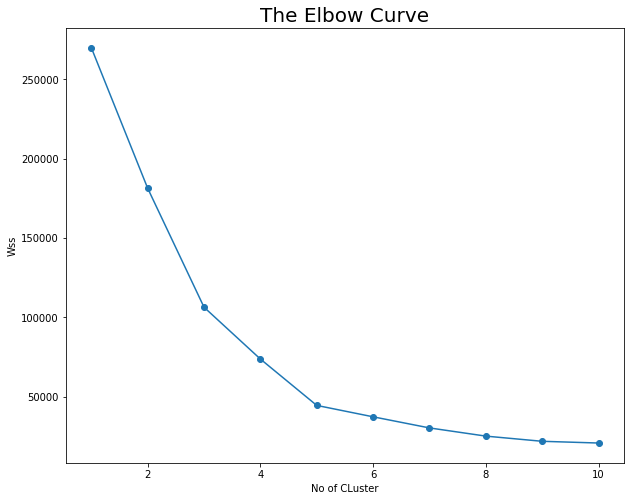

In [76]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wss,marker='o')
plt.title('The Elbow Curve',fontsize=20)
plt.xlabel('No of CLuster')
plt.ylabel('Wss')
plt.show()

In [81]:
km.cluster_centers_

array([90.44444444, 33.27272727, 46.21428571, 15.32142857, 80.04761905,
       73.28571429, 51.97674419,  9.58333333, 78.42857143, 17.5       ])

#### choosen K = 5 it is optimal k 